In [19]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
import models
from models.evaluation import cross_validation_predict, cross_validation_score
from sklearn.metrics import accuracy_score
from utils import load_datasets, load_target, save_submission
import json
sns.set_style('darkgrid')
%matplotlib inline


In [21]:
train = pd.read_csv('data/input/train.csv', index_col='row_id')
# train.drop_duplicates(keep='first', inplace=True)
train.reset_index(drop=True, inplace=True)
test = pd.read_csv('data/input/test.csv', index_col='row_id')
# data = pd.concat([train, test], sort=False)
# train = data[:len(train)]
# test = data[len(train):]
sample_submission = pd.read_csv(
    'data/input/sample_submission.csv')


In [25]:
print("duplicates in train: {}".format(train.duplicated().sum()))
print("duplicates in test: {}".format(test.duplicated().sum()))
print("duplicates in train and test: {}".format(
    pd.concat([train.drop('target', axis=1), test], sort=False).duplicated().sum()))

duplicates in train: 76007
duplicates in test: 26779
duplicates in train and test: 103052


In [26]:
pd.concat([train.drop('target', axis=1), test], sort=False)

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000042,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000068,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,-9.536743e-07,-0.000008,-0.000043,-0.000108,-0.000194,-0.000234,-0.000195,-0.000110,-0.000043,-0.000010,...,0.000159,0.000559,0.000489,0.000499,0.000899,0.000443,0.000047,0.000148,0.000101,4.046326e-06
299996,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
299997,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,0.000914,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
299998,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07


In [27]:
train = pd.read_csv('./data/input/train.csv', index_col='row_id')
test = pd.read_csv('./data/input/test.csv', index_col='row_id')
train_without_target = train.drop('target', axis=1)

concat = pd.concat([train_without_target, test], sort=False)


In [38]:
''.join(["a", "b"])

'ab'

In [49]:
test.iloc[[1,2,3], :]

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
row_id,,,,,,,,,,,,,,,,,,,,,
200001,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,-0.000010,...,-0.000043,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
200002,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,-0.000008,...,0.000041,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08
200003,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,-0.000008,...,0.000069,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07


In [46]:
last = concat[concat.duplicated()].tail(1)
hoge = train
for c in last.columns:
    hoge = hoge[hoge[c] == last[c].iloc[-1]]
hoge

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,


In [39]:
[i for i, c in enume]

['A0T0G0C10',
 'A0T0G1C9',
 'A0T0G2C8',
 'A0T0G3C7',
 'A0T0G4C6',
 'A0T0G5C5',
 'A0T0G6C4',
 'A0T0G7C3',
 'A0T0G8C2',
 'A0T0G9C1',
 'A0T0G10C0',
 'A0T1G0C9',
 'A0T1G1C8',
 'A0T1G2C7',
 'A0T1G3C6',
 'A0T1G4C5',
 'A0T1G5C4',
 'A0T1G6C3',
 'A0T1G7C2',
 'A0T1G8C1',
 'A0T1G9C0',
 'A0T2G0C8',
 'A0T2G1C7',
 'A0T2G2C6',
 'A0T2G3C5',
 'A0T2G4C4',
 'A0T2G5C3',
 'A0T2G6C2',
 'A0T2G7C1',
 'A0T2G8C0',
 'A0T3G0C7',
 'A0T3G1C6',
 'A0T3G2C5',
 'A0T3G3C4',
 'A0T3G4C3',
 'A0T3G5C2',
 'A0T3G6C1',
 'A0T3G7C0',
 'A0T4G0C6',
 'A0T4G1C5',
 'A0T4G2C4',
 'A0T4G3C3',
 'A0T4G4C2',
 'A0T4G5C1',
 'A0T4G6C0',
 'A0T5G0C5',
 'A0T5G1C4',
 'A0T5G2C3',
 'A0T5G3C2',
 'A0T5G4C1',
 'A0T5G5C0',
 'A0T6G0C4',
 'A0T6G1C3',
 'A0T6G2C2',
 'A0T6G3C1',
 'A0T6G4C0',
 'A0T7G0C3',
 'A0T7G1C2',
 'A0T7G2C1',
 'A0T7G3C0',
 'A0T8G0C2',
 'A0T8G1C1',
 'A0T8G2C0',
 'A0T9G0C1',
 'A0T9G1C0',
 'A0T10G0C0',
 'A1T0G0C9',
 'A1T0G1C8',
 'A1T0G2C7',
 'A1T0G3C6',
 'A1T0G4C5',
 'A1T0G5C4',
 'A1T0G6C3',
 'A1T0G7C2',
 'A1T0G8C1',
 'A1T0G9C0',
 'A1T1G0C

In [ ]:
train

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000151,0.000100,0.000180,0.000202,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123988,-9.536743e-07,1.046326e-05,0.000057,0.000006,0.000080,0.000260,0.000140,0.000096,-0.000033,-0.000010,...,0.000014,0.000057,0.000044,0.000014,-0.000033,-9.536743e-06,0.000010,-0.000010,-9.536743e-07,Klebsiella_pneumoniae
123989,-9.536743e-07,-4.536743e-06,0.000002,0.000042,0.000066,0.000018,0.000057,0.000031,-0.000002,-0.000007,...,0.000122,0.000053,0.000120,0.000133,0.000088,1.146326e-05,0.000010,0.000027,4.632568e-08,Escherichia_coli
123990,-9.536743e-07,-4.536743e-06,-0.000019,-0.000053,-0.000092,-0.000129,-0.000099,-0.000045,-0.000026,-0.000009,...,0.000358,0.000328,0.000310,0.000545,0.000244,5.546326e-05,0.000073,0.000075,4.632568e-08,Bacteroides_fragilis
123991,-9.536743e-07,4.632568e-07,-0.000003,0.000176,0.000350,0.000290,0.000200,0.000206,-0.000023,-0.000010,...,0.000124,0.000057,0.000104,0.000144,0.000027,4.632568e-07,0.000060,0.000020,-9.536743e-07,Salmonella_enterica


In [ ]:
test

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
200000,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,-0.000008,...,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08,NaN
200001,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,-0.000010,...,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,NaN
200002,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,-0.000008,...,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08,NaN
200003,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,-0.000008,...,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07,NaN
200004,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,0.000990,-9.536743e-07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,-9.536743e-07,-0.000008,-4.291534e-05,-0.000108,-0.000194,-0.000234,-0.000195,-0.000110,-0.000043,-0.000010,...,0.000559,0.000489,0.000499,0.000899,0.000443,0.000047,0.000148,0.000101,4.046326e-06,NaN
299996,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,NaN
299997,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,NaN
299998,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,NaN


In [14]:
X_train = train.drop('target', axis=1)
y_train = train['target']

In [15]:
X_train.apply(lambda x: x/x.sum(), axis=1)


,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,-1.235962e+08,-1.235962e+09,-5.561828e+09,-1.483154e+10,-2.595520e+10,-3.114624e+10,-2.595520e+10,-1.483154e+10,-5.561828e+09,-1.235962e+09,...,-5.561828e+09,-1.112366e+10,-5.561828e+09,-1.112366e+10,-1.112366e+10,-5.561828e+09,-1.235962e+09,-1.235962e+09,-1.235962e+09,-1.235962e+08
1,-2.973260e+08,-2.973260e+09,-1.337967e+10,2.760898e+11,-6.243846e+10,2.368428e+11,-6.243846e+10,-3.567912e+10,-1.337967e+10,-2.973260e+09,...,-1.337967e+10,-2.675934e+10,-1.337967e+10,2.850096e+11,2.850096e+11,-1.337967e+10,-2.973260e+09,-2.973260e+09,-2.973260e+09,-2.973260e+08
2,1.857283e+09,2.992811e+09,-1.379739e+10,-2.503691e+11,-5.214017e+11,-5.251909e+11,-4.727142e+11,-2.425791e+11,-2.112370e+09,1.273032e+10,...,-8.195997e+10,-1.639199e+11,-9.364499e+10,-1.580774e+11,-2.067650e+11,-1.403851e+11,-2.037722e+10,-1.648221e+10,-3.790474e+10,-2.037722e+09
3,-2.567783e+08,3.068957e+10,-6.698394e+10,-1.355565e+12,-2.725597e+12,-2.891583e+12,-2.193480e+12,-1.089506e+12,1.615944e+10,3.623246e+10,...,-3.773859e+11,-8.379151e+11,-5.547584e+11,-9.986590e+11,-1.120603e+12,-8.485317e+11,-1.189685e+11,-8.571116e+10,-2.575408e+11,5.286114e+09
4,-1.218430e+08,-1.218430e+09,-5.482937e+09,-1.462117e+10,-2.558704e+10,-3.070445e+10,-2.558704e+10,-1.462117e+10,-5.482937e+09,-1.218430e+09,...,-5.482937e+09,-1.096587e+10,-5.482937e+09,-1.096587e+10,-1.096587e+10,-5.482937e+09,-1.218430e+09,-1.218430e+09,-1.218430e+09,-1.218430e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123988,-1.416896e+09,1.554551e+10,8.481202e+10,8.259259e+09,1.184544e+11,3.858039e+11,2.075978e+11,1.419744e+11,-4.890310e+10,-1.416896e+10,...,4.024031e+10,2.105168e+10,8.481202e+10,6.562339e+10,2.105168e+10,-4.890310e+10,-1.416896e+10,1.554551e+10,-1.416896e+10,-1.416896e+09
123989,9.644839e+08,4.588166e+09,-2.108285e+09,-4.203014e+10,-6.647340e+10,-1.787440e+10,-5.737139e+10,-3.090546e+10,1.937054e+09,6.610835e+09,...,-4.964101e+10,-1.235541e+11,-5.368635e+10,-1.215314e+11,-1.346787e+11,-8.908306e+10,-1.159319e+10,-1.058185e+10,-2.777454e+10,-4.685077e+07
123990,-1.049152e+09,-4.990943e+09,-2.080907e+10,-5.879121e+10,-1.015095e+11,-1.422735e+11,-1.092103e+11,-4.999028e+10,-2.850988e+10,-9.391407e+09,...,9.910357e+10,3.940278e+11,3.609312e+11,3.412222e+11,5.997494e+11,2.685214e+11,6.101601e+10,8.081810e+10,8.301833e+10,5.096362e+07
123991,1.057223e+10,-5.135565e+09,3.231888e+10,-1.946210e+12,-3.877013e+12,-3.211264e+12,-2.214146e+12,-2.278784e+12,2.540345e+11,1.057223e+11,...,-1.893968e+11,-1.376514e+12,-6.328281e+11,-1.154798e+12,-1.598230e+12,-3.002546e+11,-5.135565e+09,-6.702826e+11,-2.268512e+11,1.057223e+10


In [5]:
df_train_row_count, df_train_column_count = train.shape
print('Total number of rows:', df_train_row_count)
print('Total number of columns:', df_train_column_count)

Total number of rows: 200000
Total number of columns: 287


In [6]:
df_test_row_count, df_test_column_count = test.shape
print('Total number of rows:', df_test_row_count)
print('Total number of columns:', df_test_column_count)

Total number of rows: 100000
Total number of columns: 287


/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'category distribution'}, xlabel='target', ylabel='count'>

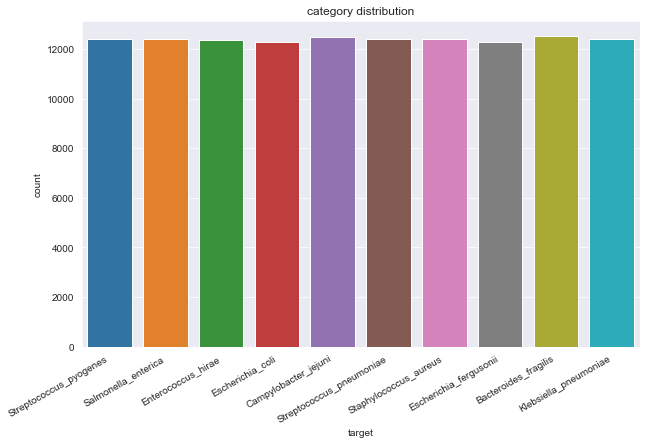

In [18]:
plt.figure(figsize=(10,6))
plt.title('category distribution')
plt.xticks(rotation=30, ha='right')
sns.countplot(train['target'], data=train)

In [8]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
A0T0G0C10,200000.0,NaN,NaN,NaN,0.000001,0.000087,-0.000001,-0.000001,-0.000001,-0.000001,0.009999
A0T0G1C9,200000.0,NaN,NaN,NaN,-0.000003,0.000132,-0.00001,-0.00001,-0.00001,-0.000003,0.00999
A0T0G2C8,200000.0,NaN,NaN,NaN,-0.000014,0.000287,-0.000043,-0.000043,-0.000043,-0.000013,0.009957
A0T0G3C7,200000.0,NaN,NaN,NaN,-0.00001,0.000436,-0.000114,-0.000114,-0.000114,-0.000004,0.009886
A0T0G4C6,200000.0,NaN,NaN,NaN,0.000005,0.000683,-0.0002,-0.0002,-0.0002,-0.000011,0.0198
...,...,...,...,...,...,...,...,...,...,...,...
A9T0G0C1,200000.0,NaN,NaN,NaN,0.000062,0.000466,-0.00001,-0.00001,-0.00001,0.00003,0.00999
A9T0G1C0,200000.0,NaN,NaN,NaN,0.00009,0.000548,-0.00001,-0.00001,0.0,0.00006,0.00999
A9T1G0C0,200000.0,NaN,NaN,NaN,0.000117,0.000679,-0.00001,-0.00001,0.0,0.000069,0.01999
A10T0G0C0,200000.0,NaN,NaN,NaN,0.0,0.000021,-0.000001,-0.000001,-0.000001,-0.000001,0.000999


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Columns: 287 entries, A0T0G0C10 to target
dtypes: float64(286), object(1)
memory usage: 439.5+ MB


In [10]:
# nanはなし
train.isna().sum().sum()

0

In [11]:
print("Unique values are:\n", train.nunique())

Unique values are:
 A0T0G0C10      18
A0T0G1C9       23
A0T0G2C8      139
A0T0G3C7      683
A0T0G4C6     1279
             ... 
A9T0G0C1      354
A9T0G1C0      509
A9T1G0C0      515
A10T0G0C0      22
target         10
Length: 287, dtype: int64


In [12]:
categorical = train.columns[train.dtypes == "object"].to_numpy()
numerical = train.columns[train.dtypes != "object"].to_numpy()

/var/folders/j2/4n4tf62d54vds9str1506rsh0000gn/T/ipykernel_56039/1693791633.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


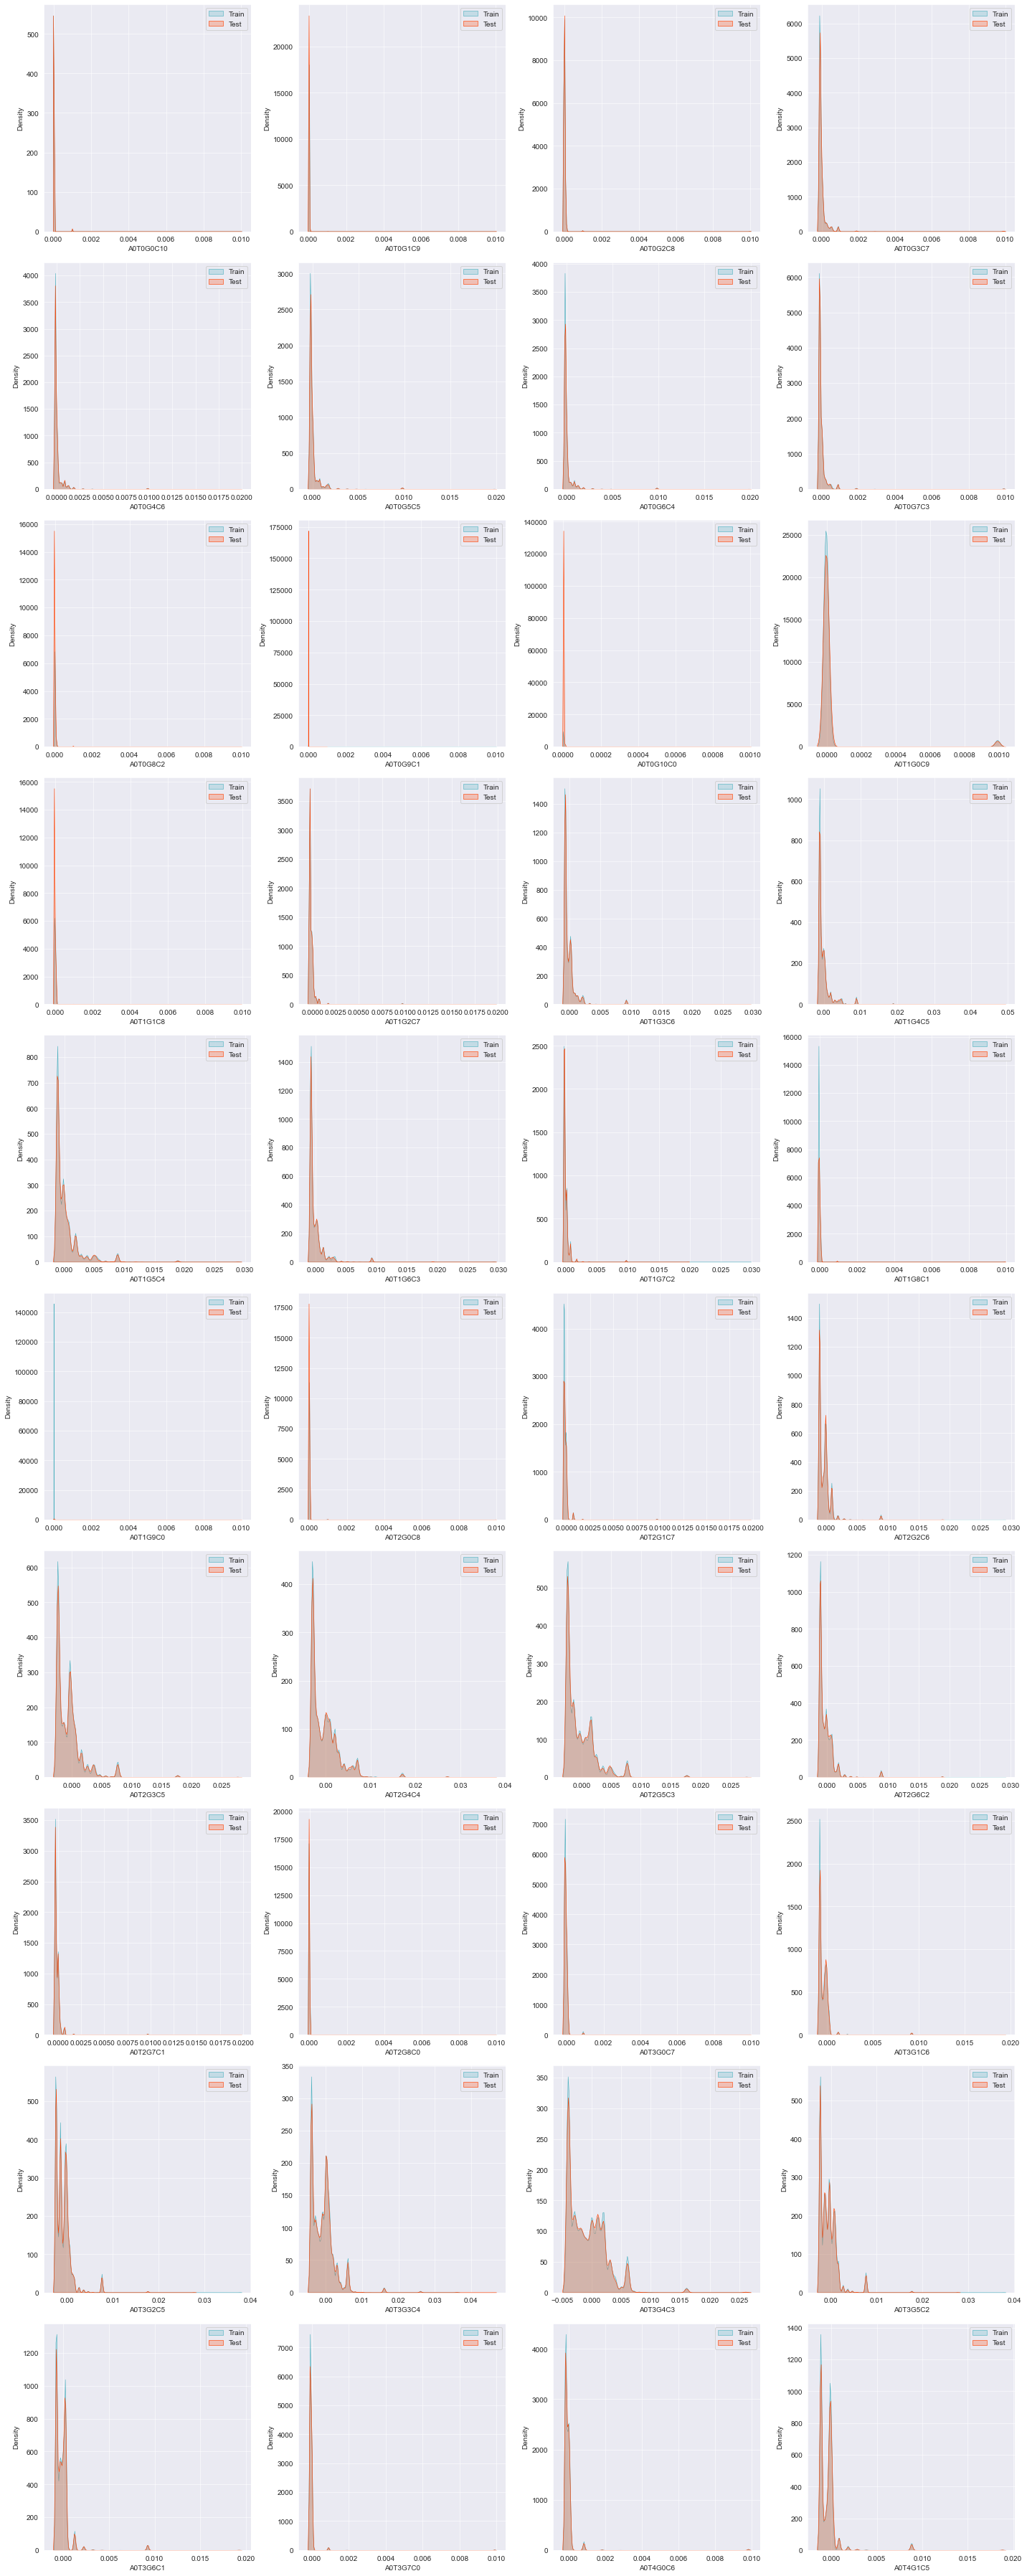

In [13]:
# 分布はほぼ同じ
fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 4
for idx, num in enumerate(numerical[:40]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha=0.7, axis="both")
    sns.kdeplot(x=num, fill=True, color='#50B2C0',
                linewidth=0.6, data=train, label="Train")
    sns.kdeplot(x=num, fill=True, color='#FF4000',
                linewidth=0.6, data=test, label="Test")
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

In [23]:
config = json.load(open('./config/default.json'))
# X_train, X_test = load_datasets(["Age", "AgeSplit", "EducationNum"])
X_train, X_test = load_datasets(config['features'])
y_train = load_target('target')

In [24]:
lgbm = models.Lgbm({'objective': 'multiclass',
                    'num_class':10,
                    'num_boost_round': 10})
lgbm.fit(X_train, y_train)


/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/yutahirai/opt/anaconda3/envs/tensorflow26/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67628
[LightGBM] [Info] Number of data points in the train set: 140000, number of used features: 286
[LightGBM] [Info] Start training from score -2.295680
[LightGBM] [Info] Start training from score -2.299447
[LightGBM] [Info] Start training from score -2.305231
[LightGBM] [Info] Start training from score -2.304659
[LightGBM] [Info] Start training from score -2.305733
[LightGBM] [Info] Start training from score -2.310257
[LightGBM] [Info] Start training from score -2.301086
[LightGBM] [Info] Start training from score -2.306163
[LightGBM] [Info] Start training from score -2.298878
[LightGBM] [Info] Start training from score -2.298807


In [29]:
y_ = lgbm.predict(X_train)
score = accuracy_score(y_train, np.argmax(y_, axis=1))
score

0.869035

In [19]:
y_train.shape

(200000,)

In [18]:
np.argmax(lgbm.predict(X_train), axis=1).shape

(200000,)

In [22]:
from sklearn.metrics import log_loss
log_loss(y_train, lgbm.predict(X_train))

0.7953312673674885